In [4]:
%matplotlib inline

In [1]:
import numpy as np

# Multidimensional Arrays with Numpy

## Matrix Exercises

Numpy arrays can be multidimensional: they can be squares, cubes, hypercubes, etc!  When choosing datastructures, Arrays are best chosen when all of the values in the structure represent the same variable.

With multidimensional arrays, everything is pretty much the same as the 1-dimensional case, with the addition of a few options for specifiying which order the dimensions should be in, and which dimension an operation should operate on.

## Creating Multidimensional Arrays

Most of the array-generation functions have a **shape** or **size** optional argument in them.  If you provide a tuple with a new shape specifying the number of elements along each dimension (e.g. (5, 3) will produce a matrix with 5 rows and 3 columns), it will give you something multidimensional!

```python
>>> data = np.random.randint(1, 10, size=(4, 5))
>>> data
array([[9, 7, 4, 2, 3],
       [3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3],
       [6, 9, 4, 2, 2]])
```

For cases where there is no such option, all arrays have a **reshape()** method that lets you make it more-dimensional.  To simply **flatten** the matrix to a single dimension, you can use the **flatten()** method.

```python
>>> data.reshape(2, 10)
array([[9, 7, 4, 2, 3, 3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3, 6, 9, 4, 2, 2]])

>>> data.flatten()
array([9, 7, 4, 2, 3, 3, 6, 7, 4, 8, 3, 6, 8, 7, 3, 6, 9, 4, 2, 2])
```

Numpy also has some auto-calculation features to make it a bit easier to get the shape you need:

```python
>>> data.reshape(-1, 5)  # -1 tells the reshape() method to calculate the value in that spot
array([[9, 7, 4, 2, 3],
       [3, 6, 7, 4, 8],
       [3, 6, 8, 7, 3],
       [6, 9, 4, 2, 2]])

>>> data.flatten()[np.newaxis, :]  # Makes a 1xN array
>>> data.flatten()[None, :]  # Also Makes a 1xN array
>>> data.flatten()[:, None]  # Makes an Nx1 array
```

And if an array has some extra dimensions you don't care about (like a 32x1x1 array, and you just want a 32 array), you can use the **squeeze()** method to squeeze out those extra dimensions!

Finally, you can find out the shape of a matrix by getting its **shape** attribute.  And to get the total number of elements, check its **size** attribute.

```python
>>> data.shape
(4, 5)

>>> data.size
20
```

### Exercises

Generate a 3 x 10 array of random integers between 1 and 4.

Make an array with all the values between 0 and 11, and reshape it into a 3 x 4 matrix...

...Reshape the previous array into a 4 x 3 matrix...

...Reshape that array into a 2 x 6 matrix...

...Then flatten it.

Confirm its shape.  Is it the same as its size?

### Reordering Dimensions

There are many ways to transpose matrices:
  - array.T
  - array.transpose()
  - np.transpose(array)
  - array.swapaxes()

Try using each of them on the array **x**.

In [16]:
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

**Discussion**: Let's try out each of them.  Why does Numpy have these options?  What's the benefit?

### Aggregating Across Axes

Almost all of the Numpy functions have an **axis** option, which lets you limit the operation to just that axis.  

For example, to get the mean of all rows:

```python
>>> array = np.arange(12).reshape(3, 4)
>>> array.mean(axis=0)
array([4., 5., 6., 7.])
```

And the mean of the columns:

```python
>>> array.mean(axis=1)
array([1.5, 5.5, 9.5])
```

Notice that the number of dimensions goes down by default whenever you aggregate across the axis.  If you'd like to keep the dimensions the same, you can also use the **keepdims=True** option:

```python
>>> array.mean(axis=1, keepdims=True)
array([[1.5],
       [5.5],
       [9.5]])
```

**Exercises**: Try it out for yourself, with the provided array "data":

In [8]:
np.random.seed(42)
data = np.random.randint(0, 10, size=(5, 3)) * [1, 10, 100]
data

array([[  6,  30, 700],
       [  4,  60, 900],
       [  2,  60, 700],
       [  4,  30, 700],
       [  7,  20, 500]])

1. What is the mean of each column?

2. What is the standard deviation of each row?

3. What is the mean of each column's median?

## Indexing Exercises

Numpy arrays work the same way as other sequences, but they can have multiple dimensions (rows, columns, etc) over which to index/slice the array.

```python
data = np.array([[0, 1, 2,  3],
                 [4, 5, 6,  7],
                 [8, 9, 10, 11]]
               )
second_row = data[1, :]
third_column = data[:, 2]
```

Using the example dataset *scores*, select only the described elements from each list:

In [49]:
scores = np.arange(1, 49).reshape(6, 8)
scores

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48]])

The first score in the 2nd row:

The third-through-fifth columns:

The last score:

The 2nd through 5th score, in the 6th column:

All the scores greater than 20:

The rectangle inscribed by scores 19, 22, 35, and 38:

The rectangle inscribed by scores 42, 44, 12, and 10:

##### Setting New Values

For arrays, indexing can also be used to assign a new value.  Let's try it out, using the following pattern:

```python
data[0, :] = 10  # changes all values in the first row to 10
data
```

In [11]:
scores = np.arange(1, 49).reshape(6, 8)
scores

array([[ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16],
       [17, 18, 19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30, 31, 32],
       [33, 34, 35, 36, 37, 38, 39, 40],
       [41, 42, 43, 44, 45, 46, 47, 48]])

Change the 3rd column to all 10s:

Change the last score to 999:

Change the 4th row to 0:

Change the 5th column to nan  (e.g. np.nan)

### Cropping Images
Images are just 3D arrays of integers!  Let's load an image and visualize it onscreen using Matplotlib, a plotting library.  Working with images generally uses these 3 functions:

| Function | Purpose  | Example |
| :----:   | :----:   | :---:   |
| plt.imread() | Loads a image from a filename  | plt.imread("brian.png" |
| plt.imshow() | Plots a multidimensional array as an image | plt.imshow(my_image_array) |
| plt.imsave() | Saves an array as an image on the computer | plt.imsave("new_image.jpg", my_array) |

Let's **plt.imread()** function and do some cropping exercises on the image:

In [6]:
import matplotlib.pyplot as plt

image = plt.imread('cells.jpg')
image.shape

(170, 297, 3)

In [7]:
type(image)

numpy.ndarray

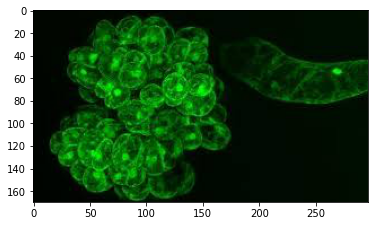

In [8]:
plt.imshow(image);

**Exercises:** Crop the image in the following ways using slicing, writing code like the following:  

```python
new_image = image[20:50, 50:100]
plt.imshow(new_image)
```

1.  Show only the left cluster of cells.

2. Show only the right cluster of cells.

3. Show only the tiny bright spot in the right cluster.

4. Show just the empty part of the image in the lower-right hand side.